In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [96]:
import sklearn

In [97]:
# Create dataframe
df_1987_to_2020 = pd.read_excel(r'C:\Users\dlbry\Downloads\ThinkStats2-master\code\NFL Combine Data.xlsx') 


In [98]:
#profile = df_1987_to_2020.profile_report(title='Pandas Profiling Report')
#profile.to_file(outputfile="data profiling.html")

In [99]:
df_1987_to_2020.head()

,Year,Name,College,POS,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,60Yd Shuttle
0,1987,Rod Woodson,Purdue,CB,72.0,202,10.50,31.00,NaN,4.33,10.0,36.0,125.0,3.98,NaN,10.92
1,1987,Greg Richardson,Alabama,WR,67.3,164,NaN,NaN,NaN,4.35,1.0,28.0,113.0,4.21,NaN,11.54
2,1987,Eric Thomas,Tulane (LA),CB,70.3,171,8.25,30.75,NaN,4.38,7.0,35.0,126.0,4.22,NaN,11.58
3,1987,Ricky Nattiel,Florida,WR,68.9,178,NaN,NaN,NaN,4.41,NaN,32.0,116.0,NaN,NaN,NaN
4,1987,Haywood Jeffires,North Carolina State,WR,74.1,191,9.00,33.00,NaN,4.41,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df_1987_to_2020.describe()

,Year,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,60Yd Shuttle
count,10907.000000,10907.000000,10907.000000,9232.000000,8914.000000,431.000000,9828.000000,7458.000000,8781.000000,8618.000000,7711.000000,5028.000000,3245.000000
mean,2003.683689,73.763901,240.213991,9.533188,32.220635,24.044084,4.823333,19.827031,32.113654,112.736134,4.404435,7.337778,11.676191
std,10.086335,2.634789,44.932148,0.621553,1.490164,7.614576,0.308427,6.496746,4.210463,9.364339,0.267494,0.441416,0.425146
min,1987.000000,64.900000,142.000000,7.130000,25.630000,4.000000,4.210000,1.000000,17.500000,7.000000,3.730000,6.340000,10.430000
25%,1994.000000,71.900000,203.000000,9.130000,31.250000,19.000000,4.580000,15.000000,29.000000,107.000000,4.200000,7.010000,11.380000
50%,2004.000000,74.000000,232.000000,9.500000,32.250000,24.000000,4.750000,20.000000,32.500000,114.000000,4.370000,7.250000,11.650000
75%,2013.000000,75.800000,275.000000,10.000000,33.250000,29.000000,5.030000,24.000000,35.000000,119.000000,4.570000,7.610000,11.930000
max,2020.000000,82.400000,387.000000,11.880000,38.500000,48.000000,6.120000,51.000000,46.000000,147.000000,5.680000,9.610000,13.910000


In [101]:
df_1987_to_2020.dtypes

Year                 int64
Name                object
College             object
POS                 object
Height (in)        float64
Weight (lbs)         int64
Hand Size (in)     float64
Arm Length (in)    float64
Wonderlic          float64
40 Yard            float64
Bench Press        float64
Vert Leap (in)     float64
Broad Jump (in)    float64
Shuttle            float64
3Cone              float64
60Yd Shuttle       float64
dtype: object

In [102]:
# Delete Wonderlic since it is not an athletic measurment
df_1987_to_2020.drop(['Wonderlic'], axis=1, inplace=True)

In [103]:
# Rename columns
df_1987_to_2020.columns = ['Year', 'Name', 'College', 'POS', 'Height', 'Weight',
       'Hand_Size', 'Arm_Length', 'Forty_Yard',
       'Bench_Press', 'Vert_Leap', 'Broad_Jump', 'Shuttle', '3Cone',
       '60Yd_Shuttle']

In [104]:
df_1987_to_2020.columns

Index(['Year', 'Name', 'College', 'POS', 'Height', 'Weight', 'Hand_Size',
       'Arm_Length', 'Forty_Yard', 'Bench_Press', 'Vert_Leap', 'Broad_Jump',
       'Shuttle', '3Cone', '60Yd_Shuttle'],
      dtype='object')

In [105]:
df_1987_to_2020.isna().sum()

Year               0
Name               0
College            0
POS                0
Height             0
Weight             0
Hand_Size       1675
Arm_Length      1993
Forty_Yard      1079
Bench_Press     3449
Vert_Leap       2126
Broad_Jump      2289
Shuttle         3196
3Cone           5879
60Yd_Shuttle    7662
dtype: int64

In [106]:
# We will use the Height and Weight variables to create the BMI variable
# Convert Weight to kilograms and divide by Height in Meters squared
df_1987_to_2020['BMI'] = (df_1987_to_2020['Weight']/2.2)/(df_1987_to_2020['Height']/39.37)**2

In [107]:
# The variable Bench_Press measures the number of repetitions performed using a 225 lb. weight.
# We will create a new variable (Max_Bench_Press) that estimates the player's maximum single rep. bench press.
# If Bench_Press = 1, then the player benched 225 only once, and so his Max_Bench_Press = 225. Otherwise
# We will use the formula from (https://www.menshealth.com/fitness/a19521986/estimating-your-max-bench-press-safely/)
# Max_Bench_Press = 225 x Bench_Press x 0.0333 + 225

row_indexes=df_1987_to_2020[df_1987_to_2020['Bench_Press']==1].index
df_1987_to_2020.loc[row_indexes,'Max_Bench_Press']=225
row_indexes=df_1987_to_2020[df_1987_to_2020['Bench_Press']>1].index
df_1987_to_2020.loc[row_indexes,'Max_Bench_Press']=225*df_1987_to_2020.loc[row_indexes,'Bench_Press']*0.0333+225



In [108]:
# We will use the Max_Bench_Press variable and the Weight variable to create the Relative_Strength variable
# This Relative_Strength variable divides a players Max_Bench_Press by their Weight
df_1987_to_2020['Relative_Strength'] = df_1987_to_2020['Max_Bench_Press']/(df_1987_to_2020['Weight'])

In [109]:
# Subset Combine results prior to the year 2000
df_1987_to_1999 = df_1987_to_2020[(df_1987_to_2020['Year']<2000)]

# Subset Combine results after the year 2000
df_2000_to_2020 = df_1987_to_2020[(df_1987_to_2020['Year']>=2000)]

In [110]:
def MakeFrames(df):
    """Subsets the df into four position groups (WR_RB_DB, Lineman, LB_FB_TE_QB, Special teams (ST))

    returns: DataFrames (WR_RB_DB, Lineman, LB_FB_TE_QB, ST)
    
    """
    
    WR_RB_DB = df[(df['POS'] == 'WR') | (df['POS'] == 'CB') | (df['POS']=='SS') | (df['POS'] == 'FS')
          | (df['POS'] == 'DB') | (df['POS'] == 'S') | (df['POS'] == 'RB')]
    
    lineman = df[(df['POS'] == 'OT') | (df['POS'] == 'OG') | (df['POS']=='DL') | (df['POS'] == 'NT')
          | (df['POS'] == 'DT') | (df['POS'] == 'DE') |(df['POS'] == 'C') | (df['POS'] == 'G') 
          |(df['POS'] == 'OL')]
    
    LB_FB_TE_QB = df[(df['POS'] == 'TE') | (df['POS'] == 'FB') | (df['POS']=='OLB') | (df['POS'] == 'ILB')
          | (df['POS'] == 'LB') | (df['POS'] == 'EDG') |(df['POS'] == 'QB')]

    ST = df[(df['POS'] == 'K') | (df['POS'] == 'P') | (df['POS']=='LS')]

    return WR_RB_DB, lineman, LB_FB_TE_QB, ST

In [111]:
# Create dataframes based on position groupings for the years 1987 to 2020
WR_RB_DB_1987_to_2020, lineman_1987_to_2020, LB_FB_TE_QB_1987_to_2020, ST_1987_to_2020 = MakeFrames(df_1987_to_2020)

In [112]:
# Create dataframes based on position groupings for the years 2000 to 2020
WR_RB_DB_2000_to_2020, lineman_2000_to_2020, LB_FB_TE_QB_2000_to_2020, ST_2000_to_2020 = MakeFrames(df_2000_to_2020)

In [113]:
# Create dataframes based on position groupings for the years 1987 to 1999
WR_RB_DB_1987_to_1999, lineman_1987_to_1999, LB_FB_TE_QB_1987_to_1999, ST_1987_to_1999 = MakeFrames(df_1987_to_1999)

In [114]:
(df_1987_to_2020.groupby(["Year", "Name"]))["Weight"].mean()


# Select all duplicate rows based on one column
duplicateRowsDF = df_1987_to_2020[df_1987_to_2020.duplicated(["Year", "Name"], keep=False)]
duplicateRowsDF

,Year,Name,College,POS,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,BMI,Max_Bench_Press,Relative_Strength
36,1987,Walter Johnson,Louisiana Tech,OLB,71.100,240,9.25,32.00,4.54,22.0,29.5,116.0,4.36,NaN,11.33,33.448773,389.8350,1.624313
177,1987,Walter Johnson,Pittsburgh,DT,73.000,257,9.50,31.25,4.97,20.0,28.5,110.0,4.86,NaN,NaN,33.977823,374.8500,1.458560
365,1988,Greg Cox,San Jose State,SS,71.000,215,9.75,NaN,4.67,15.0,30.0,114.0,4.34,NaN,11.69,30.048992,337.3875,1.569244
560,1988,Greg Cox,Miami (FL),K,76.300,207,9.00,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,25.051251,299.9250,1.448913
671,1989,Eddie Johnson,Penn State,CB,69.500,169,NaN,NaN,4.67,13.0,33.5,117.0,4.44,NaN,11.74,24.650472,322.4025,1.907707
672,1989,Eddie Johnson,Utah,WR,68.500,172,NaN,NaN,4.67,14.0,33.5,119.0,4.36,NaN,11.68,25.825899,329.8950,1.917994
897,1990,James Williams,Frenso State (CA),CB,69.900,172,8.25,29.75,4.34,9.0,38.0,129.0,4.03,NaN,10.92,24.801745,292.4325,1.700189
1017,1990,James Williams,Mississippi State,OLB,72.100,223,9.63,31.00,4.74,19.0,32.0,114.0,4.44,NaN,12.40,30.223342,367.3575,1.647343
1285,1991,Scott Miller,UCLA,WR,70.000,179,9.13,30.50,4.62,NaN,31.5,113.0,4.33,NaN,11.71,25.737425,NaN,NaN
1335,1991,Reggie Johnson,Arizona,DE,74.000,239,9.63,31.50,4.69,17.0,34.5,120.0,4.43,NaN,NaN,30.749822,352.3725,1.474362


In [115]:
# Gives the mean of 40 yard dash for each year at each position
df_1987_to_2020.pivot_table(values="Forty_Yard", index="POS", columns="Year", margins=True) 

Year,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
POS,,,,,,,,,,,,,,,,,,,,,
C,5.111667,5.154286,5.230000,5.409091,5.323478,5.409444,5.295000,5.255000,5.308000,5.397778,...,5.195000,5.320000,5.217778,5.249167,5.232857,5.352000,5.258000,5.082000,NaN,5.275449
CB,4.522632,4.596400,4.623429,4.591154,4.628400,4.642895,4.599375,4.586364,4.678750,4.603158,...,4.506757,4.492571,4.518571,4.522535,4.512069,4.480909,4.477600,4.503714,4.503571,4.540020
DB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.505000,NaN,NaN,NaN,4.505000
DE,4.994286,4.972222,4.961176,4.968947,5.006154,5.128966,4.940714,4.972609,4.983125,4.887143,...,4.796154,4.775238,4.812273,4.839615,4.879333,4.770800,4.823889,4.882000,NaN,4.885642
DL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.800000,4.783333,NaN,NaN,4.930526,4.916905
DT,4.950000,5.044000,5.147368,5.120000,5.100000,5.220000,5.123571,5.139524,5.191429,5.236923,...,5.062667,5.156667,5.123077,5.140370,5.102692,5.111667,5.160833,5.093000,NaN,5.122713
EDG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.672632,NaN,4.672632
FB,4.706667,4.618000,4.786667,4.762222,4.785000,4.723333,4.831111,4.838182,4.880000,4.725714,...,4.647500,4.832000,4.863333,4.776000,NaN,4.840000,4.770000,4.890000,NaN,4.774298
FS,4.616250,4.605556,4.648125,4.570000,4.671429,4.700000,4.662000,4.622500,4.662000,4.681818,...,4.535714,4.641429,4.555455,4.576774,4.575000,4.511667,4.546364,NaN,NaN,4.599200


In [116]:
lineman_1987_to_2020[(lineman_1987_to_2020['POS']=='OT')& (lineman_1987_to_2020['Year']== 2020)]

,Year,Name,College,POS,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,BMI,Max_Bench_Press,Relative_Strength


In [117]:
lineman_1987_to_2020[lineman_1987_to_2020['Name']=='Simon Stepaniak']

,Year,Name,College,POS,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,BMI,Max_Bench_Press,Relative_Strength
10890,2020,Simon Stepaniak,Indiana,OL,76.0,321,10.38,32.0,NaN,37.0,NaN,NaN,NaN,NaN,NaN,39.154889,502.2225,1.564556


In [11]:
mylist = [19.827,15,20,24,51]
for i in mylist:
    print(225*0.0333*i +225)
          


373.55379750000003
337.3875
374.85
404.82000000000005
607.1175000000001


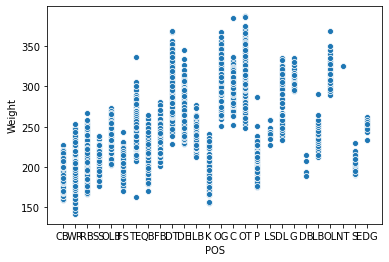

In [118]:
#sns.regplot(x='Weight',y='Height',data=df_1987_to_2020)
# scatter plot hue parameter
sns.scatterplot(x = "POS", y = "Weight", data = df_1987_to_2020)

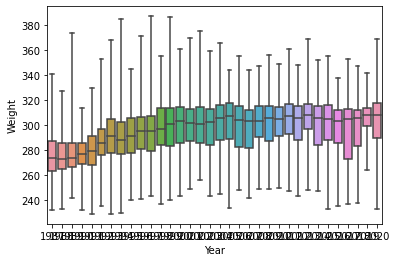

In [119]:
sns.boxplot(x='Year', y='Weight', data=lineman_1987_to_2020, whis=10)
plt.show() 

Text(0, 0.5, 'Density')

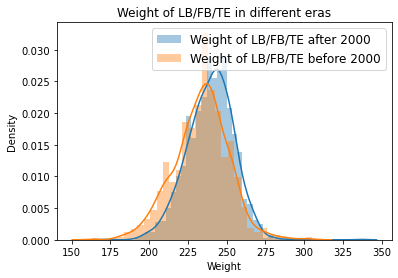

In [121]:
sns.distplot(LB_FB_TE_QB_2000_to_2020["Weight"], label='Weight of LB/FB/TE after 2000')
sns.distplot(LB_FB_TE_QB_1987_to_1999["Weight"], label='Weight of LB/FB/TE before 2000')
plt.legend(prop={'size': 12})
plt.title('Weight of LB/FB/TE in different eras')
plt.xlabel('Weight')
plt.ylabel('Density')


Text(0, 0.5, 'Density')

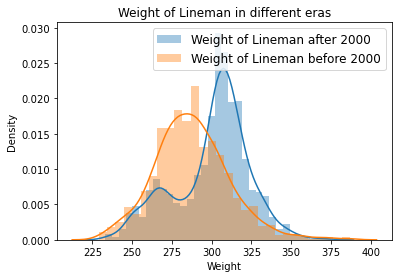

In [122]:
sns.distplot(lineman_2000_to_2020["Weight"], label='Weight of Lineman after 2000')
sns.distplot(lineman_1987_to_1999["Weight"], label='Weight of Lineman before 2000')
plt.legend(prop={'size': 12})
plt.title('Weight of Lineman in different eras')
plt.xlabel('Weight')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

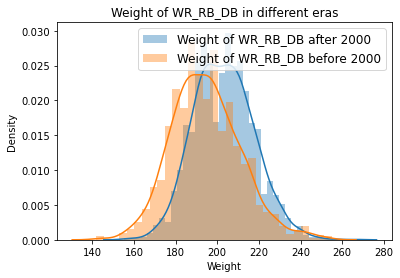

In [123]:
sns.distplot(WR_RB_DB_2000_to_2020["Weight"], label='Weight of WR_RB_DB after 2000')
sns.distplot(WR_RB_DB_1987_to_1999["Weight"], label='Weight of WR_RB_DB before 2000')
plt.legend(prop={'size': 12})
plt.title('Weight of WR_RB_DB in different eras')
plt.xlabel('Weight')
plt.ylabel('Density')

In [124]:
ST_1987_to_2020
ST_1987_to_2020[ST_1987_to_2020['Relative_Strength']>2]

,Year,Name,College,POS,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,BMI,Max_Bench_Press,Relative_Strength
539,1988,Barry Belli,Frenso State (CA),K,69.1,167,7.5,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,24.641579,359.865,2.15488


(array([  2.,   7.,  21.,  20.,  50.,  54., 106., 105., 133., 136.,  98.,
         80.,  64.,  41.,  20.,  11.,   6.,   3.,   1.,   2.]),
 array([1.14175926, 1.19856978, 1.25538029, 1.31219081, 1.36900133,
        1.42581185, 1.48262237, 1.53943288, 1.5962434 , 1.65305392,
        1.70986444, 1.76667495, 1.82348547, 1.88029599, 1.93710651,
        1.99391702, 2.05072754, 2.10753806, 2.16434858, 2.2211591 ,
        2.27796961]),
 <a list of 20 Patch objects>)

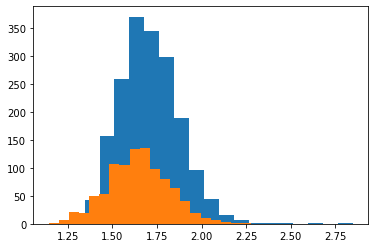

In [125]:
plt.hist(WR_RB_DB_2000_to_2020.Relative_Strength.dropna(), bins=20)
plt.hist(WR_RB_DB_1987_to_1999.Relative_Strength.dropna(), bins=20)


In [126]:
display(df_1987_to_2020[df_1987_to_2020['Bench_Press'] > df_1987_to_2020.Bench_Press.mean()])

,Year,Name,College,POS,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,BMI,Max_Bench_Press,Relative_Strength
36,1987,Walter Johnson,Louisiana Tech,OLB,71.1,240,9.25,32.00,4.54,22.0,29.5,116.0,4.36,NaN,11.33,33.448773,389.8350,1.624313
64,1987,Tim Jordan,Wisconsin,OLB,75.0,226,8.75,31.50,4.60,21.0,28.5,112.0,4.20,NaN,11.42,28.307014,382.3425,1.691781
70,1987,Donald Evans,Winston-Salem State (NC),DT,73.8,262,8.50,32.00,4.62,29.0,31.0,115.0,4.52,NaN,NaN,33.891962,442.2825,1.688101
78,1987,Henry Rolling,Nevada Las Vegas,OLB,73.5,211,9.00,32.00,4.64,20.0,36.5,119.0,4.42,NaN,12.03,27.517940,374.8500,1.776540
84,1987,Al Smith,Utah State,OLB,72.3,228,8.75,31.25,4.66,24.0,26.0,111.0,4.50,NaN,12.58,30.730272,404.8200,1.775526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,2020,Cohl Cabral,Arizona State,OL,77.0,304,10.00,32.25,NaN,20.0,NaN,NaN,NaN,NaN,NaN,36.124370,374.8500,1.233059
10902,2020,Trevis Gipson,Tulsa (OK),DL,76.0,259,9.63,33.88,NaN,25.0,NaN,NaN,NaN,NaN,NaN,31.592262,412.3125,1.591940
10904,2020,Yetur Gross-Matos,Penn State,DL,77.0,264,9.75,34.88,NaN,20.0,34.0,120.0,NaN,NaN,NaN,31.371163,374.8500,1.419886
10905,2020,Yetur Gross-Matos,Penn State,DL,77.0,264,9.75,34.88,NaN,20.0,34.0,120.0,NaN,NaN,NaN,31.371163,374.8500,1.419886


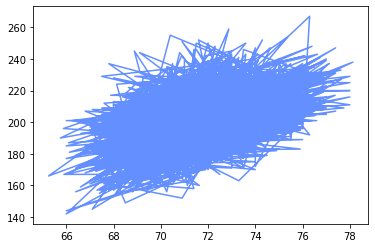

In [58]:
# Create a figure with 3x1 subplot and activate the top subplot
#plt.subplot(3, 1, 1)
plt.plot(WR_RB_DB_1987_to_2020.Height , WR_RB_DB_1987_to_2020.Weight, color='#648FFF')
#plt.title('Average Number of US Viewers')

# Activate the middle subplot
#plt.subplot(3, 1, 2)
#plt.plot(tv.super_bowl , tv.rating_household , color='#DC267F')
#plt.title('Household Rating')

# Activate the bottom subplot
#plt.subplot(3, 1, 3)
#plt.plot(tv.super_bowl , tv.ad_cost  , color='#FFB000')
#plt.title('Ad Cost')
#plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
#plt.tight_layout()###

In [59]:
# 2006 Brandon Williams and 2009 Brandon William did not participate in Bench Press
#df_1987_to_2020[df_1987_to_2020['Forty_Yard']<4.3]

In [24]:
df_1987_to_2020[df_1987_to_2020['Forty_Yard']<4.3]
df_1987_to_2020[df_1987_to_2020['Name']=='Jacoby Ford']

,Year,Name,College,POS,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle
7060,2010,Jacoby Ford,Clemson,WR,68.88,186,NaN,NaN,4.22,15.0,33.5,115.0,4.44,7.0,NaN


In [54]:
df_1987_to_2020[df_1987_to_2020['Forty_Yard']<4.29] 

,Year,Name,College,POS,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,is_duplicate,Max_Bench_Press
3968,1999,Rondel Menendez,Eastern Kentucky,WR,69.00,178,NaN,NaN,4.24,NaN,37.0,117.0,3.96,6.79,NaN,False,NaN
3969,1999,Champ Bailey,Georgia,CB,71.80,184,9.00,31.38,4.28,NaN,37.0,121.0,3.79,NaN,NaN,False,NaN
5672,2005,Jerome Mathis,Hampton (VA),WR,71.25,181,NaN,NaN,4.26,NaN,35.5,123.0,NaN,NaN,NaN,False,NaN
6774,2009,Darrius Heyward-Bey,Maryland,WR,73.63,210,NaN,NaN,4.25,16.0,38.5,126.0,4.18,6.80,NaN,False,344.8800
6775,2009,Mike Wallace,Mississippi,WR,72.38,199,NaN,NaN,4.28,14.0,40.0,129.0,4.27,6.90,NaN,False,329.8950
7059,2010,Trindon Holliday,Louisiana State,WR,65.25,166,NaN,NaN,4.21,10.0,42.0,116.0,4.48,6.54,NaN,False,299.9250
7060,2010,Jacoby Ford,Clemson,WR,68.88,186,NaN,NaN,4.22,15.0,33.5,115.0,4.44,7.00,NaN,False,337.3875
7061,2010,C.J. Spiller,Clemson,RB,70.63,196,NaN,NaN,4.27,18.0,NaN,NaN,NaN,NaN,NaN,False,359.8650
7346,2011,Demarcus Van Dyke,Miami (FL),CB,72.75,176,9.00,31.38,4.25,5.0,33.5,NaN,4.09,6.97,NaN,False,262.4625
7648,2012,Stephen Hill,Georgia Tech,WR,76.00,215,9.38,33.38,4.28,14.0,39.5,133.0,4.48,6.88,11.43,False,329.8950


In [64]:
# Variable Bench_Press measures the number of repetitions performed using a 225 lb. weight.
# We will recode a new variable (Max_Bench_Press) that estimates the player's maximum single rep. bench press.
# We will use the formula from (https://www.menshealth.com/fitness/a19521986/estimating-your-max-bench-press-safely/)
# Max_Bench_Press = 225 x Bench_Press x 0.0333 + 225
# FORMULA NEEDS TO BE CHANGED FOR A SINGLE REP TO REFLECT 225 AS MAX
#df_1987_to_2020['Max_Bench_Press'] = 225*(df_1987_to_2020['Bench_Press'])*0.033)+225
#df_1987_to_2020['Bench_Press']

#df_1987_to_2020['Relative_Strength'] = df_1987_to_2020['Max_Bench_Press']/df_1987_to_2020['Weight']

In [65]:
df_1987_to_2020.Relative_Strength.describe()
df_1987_to_2020.Max_Bench_Press.describe()

count    7458.000000
mean      373.549009
std        48.691811
min       225.000000
25%       337.387500
50%       374.850000
75%       404.820000
max       607.117500
Name: Max_Bench_Press, dtype: float64

In [66]:
df_1987_to_2020.Max_Bench_Press

0        299.9250
1        225.0000
2        277.4475
3             NaN
4             NaN
           ...   
10902    412.3125
10903         NaN
10904    374.8500
10905    374.8500
10906    427.2975
Name: Max_Bench_Press, Length: 10907, dtype: float64

In [127]:
gb = WR_RB_DB_2000_to_2020.groupby(['Year'])["Forty_Yard"].agg([np.mean])
#WR_RB_DB_2000_to_2020.groupby(['Year',"POS"])["Forty_Yard"].agg([np.mean, np.median])
db = WR_RB_DB_2000_to_2020.groupby(["Year"])[["Forty_Yard", "BMI"]].mean()

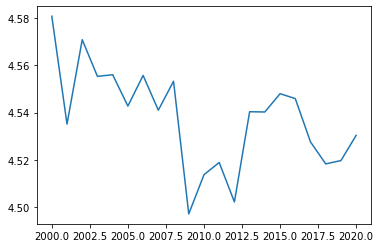

In [128]:
# This is a line plot of the mean of 40 yard dash times for players in the WR_RB_DB_2000_to_2020 df
plt.plot(gb)


In [129]:
df_1987_to_2020.POS.unique()

array(['CB', 'WR', 'RB', 'SS', 'OLB', 'FS', 'TE', 'QB', 'FB', 'DT', 'DE',
       'ILB', 'K', 'OG', 'C', 'OT', 'P', 'LS', 'DL', 'G', 'DB', 'LB',
       'OL', 'NT', 'S', 'EDG'], dtype=object)

In [75]:
WR_RB_DB_1987_to_2020.describe()

,Year,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,Max_Bench_Press,Relative_Strength,BMI
count,4384.000000,4384.000000,4384.000000,3690.000000,3560.000000,3971.000000,2804.000000,3605.000000,3546.000000,2982.000000,1904.000000,2020.000000,2804.000000,2804.000000,4384.000000
mean,2003.825046,71.637548,199.780109,9.237477,31.379753,4.567522,15.309914,34.623356,118.655950,4.223615,7.040636,11.530881,339.701517,1.685913,27.436869
std,10.199167,2.031147,15.897014,0.561886,1.276034,0.116861,5.045412,3.164098,6.260816,0.160127,0.250474,0.358120,37.826281,0.172369,2.044209
min,1987.000000,65.250000,142.000000,7.130000,25.630000,4.210000,1.000000,24.000000,95.000000,3.730000,6.340000,10.430000,225.000000,1.141759,21.303907
25%,1994.000000,70.250000,189.000000,8.880000,30.500000,4.490000,12.000000,32.500000,115.000000,4.120000,6.870000,11.290000,314.910000,1.572992,26.046572
50%,2004.000000,71.600000,199.000000,9.250000,31.380000,4.560000,15.000000,34.500000,118.000000,4.210000,7.030000,11.520000,337.387500,1.678545,27.203460
75%,2013.000000,73.000000,210.000000,9.630000,32.250000,4.640000,18.000000,36.500000,123.000000,4.330000,7.190000,11.760000,359.865000,1.797819,28.625984
max,2020.000000,78.130000,267.000000,11.380000,38.500000,5.020000,38.000000,46.000000,147.000000,5.010000,8.180000,12.920000,509.715000,2.847570,36.382116


In [79]:
lineman_1987_to_2020.describe()
lineman_1987_to_2020[lineman_1987_to_2020['Bench_Press']==41]

,Year,Name,College,POS,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,is_duplicate,Max_Bench_Press,Relative_Strength,BMI
5593,2004,Igor Olshansky,Oregon,DT,77.30,315,9.00,31.63,5.01,41.0,33.5,110.0,4.41,7.61,NaN,False,532.1925,1.689500,37.141524
7927,2012,David Molk,Michigan,C,72.88,298,8.88,32.00,5.18,41.0,NaN,NaN,NaN,NaN,NaN,False,532.1925,1.785881,39.528259
10140,2018,Vita Vea,Washington,DT,76.00,347,NaN,NaN,5.10,41.0,NaN,NaN,NaN,NaN,NaN,False,532.1925,1.533696,42.326313


In [810]:
LB_FB_TE_QB_1987_to_2020.describe()

,Year,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,Max_Bench_Press,Relative_Strength,BMI
count,2867.000000,2867.000000,2867.000000,2456.000000,2361.000000,2589.000000,1793.000000,2315.000000,2305.000000,2084.000000,1358.000000,1131.000000,1793.000000,1793.000000,2867.000000
mean,2003.532961,74.354128,237.061039,9.598103,32.280093,4.799761,20.304518,32.235680,113.019089,4.349914,7.227887,11.912564,377.127419,1.559848,30.229861
std,10.052160,1.828455,16.419742,0.555137,1.190377,0.162648,5.080915,3.501572,6.982778,0.175181,0.282971,0.409256,38.085051,0.164052,2.114453
min,1987.000000,64.900000,163.000000,7.250000,28.250000,4.330000,1.000000,21.500000,90.000000,3.830000,6.550000,10.880000,225.000000,0.990425,22.813044
25%,1994.000000,73.000000,227.000000,9.250000,31.500000,4.690000,17.000000,30.000000,109.000000,4.230000,7.030000,11.635000,352.372500,1.449076,28.845656
50%,2003.000000,74.300000,238.000000,9.630000,32.250000,4.790000,20.000000,32.000000,113.000000,4.340000,7.200000,11.890000,374.850000,1.555394,30.408169
75%,2013.000000,75.627500,248.000000,10.000000,33.080000,4.900000,24.000000,34.500000,117.000000,4.460000,7.400000,12.160000,404.820000,1.665962,31.608882
max,2020.000000,80.125000,336.000000,11.630000,36.000000,5.480000,41.000000,45.500000,139.000000,5.120000,8.380000,13.910000,532.192500,2.293933,40.450562


In [811]:
ST_1987_to_2020.describe()

,Year,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,Max_Bench_Press,Relative_Strength,BMI
count,170.000000,170.000000,170.000000,133.000000,124.000000,60.000000,24.000000,29.000000,25.000000,18.000000,6.000000,0.0,24.000000,24.000000,170.000000
mean,2003.311765,72.869000,205.970588,9.133083,30.882661,4.944667,14.625000,28.982759,108.680000,4.466111,7.280000,NaN,334.265625,1.585528,27.307813
std,12.142759,2.375514,22.249108,0.560711,1.350779,0.155841,7.270025,4.074053,7.972453,0.165214,0.194628,NaN,55.099027,0.208075,2.452944
min,1987.000000,66.800000,155.000000,7.500000,27.500000,4.630000,1.000000,21.000000,91.000000,4.130000,7.030000,NaN,225.000000,1.159794,21.862035
25%,1993.000000,71.262500,190.000000,8.750000,30.000000,4.830000,10.000000,26.000000,103.000000,4.342500,7.155000,NaN,299.925000,1.447503,25.809234
50%,1997.000000,73.000000,205.000000,9.130000,31.000000,4.940000,13.000000,29.000000,111.000000,4.470000,7.270000,NaN,322.402500,1.526464,27.211641
75%,2015.000000,74.300000,220.000000,9.500000,31.750000,5.070000,19.250000,32.500000,115.000000,4.545000,7.392500,NaN,369.230625,1.737576,28.658583
max,2020.000000,79.000000,287.000000,10.500000,34.250000,5.300000,30.000000,34.500000,120.000000,4.730000,7.560000,NaN,449.775000,2.154880,39.005428


In [812]:
# Subset Combine results prior to the year 2000
df_1987_to_1999 = df_1987_to_2020[(df_1987_to_2020['Year']<2000)]

# Subset Combine results after the year 2000
df_2000_to_2020 = df_1987_to_2020[(df_1987_to_2020['Year']>=2000)]

In [813]:
corr = df_1987_to_1999.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Year,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,Max_Bench_Press,Relative_Strength,BMI
Year,1.00,0.04,0.14,0.15,0.24,0.05,0.26,0.17,0.06,-0.09,-0.23,-0.10,0.26,-0.01,0.17
Height,0.04,1.00,0.76,0.43,0.67,0.66,0.39,-0.45,-0.42,0.54,0.51,0.35,0.39,-0.65,0.50
Weight,0.14,0.76,1.00,0.44,0.57,0.84,0.63,-0.59,-0.61,0.71,0.71,0.51,0.63,-0.67,0.95
Hand_Size,0.15,0.43,0.44,1.00,0.39,0.36,0.33,-0.18,-0.18,0.27,0.39,0.16,0.33,-0.27,0.37
Arm_Length,0.24,0.67,0.57,0.39,1.00,0.43,0.28,-0.19,-0.16,0.41,0.57,0.22,0.28,-0.49,0.43
Forty_Yard,0.05,0.66,0.84,0.36,0.43,1.00,0.43,-0.75,-0.75,0.77,0.77,0.60,0.43,-0.66,0.77
Bench_Press,0.26,0.39,0.63,0.33,0.28,0.43,1.00,-0.25,-0.26,0.32,0.31,0.16,1.00,0.14,0.65
Vert_Leap,0.17,-0.45,-0.59,-0.18,-0.19,-0.75,-0.25,1.00,0.81,-0.67,-0.66,-0.45,-0.25,0.55,-0.55
Broad_Jump,0.06,-0.42,-0.61,-0.18,-0.16,-0.75,-0.26,0.81,1.00,-0.66,-0.63,-0.46,-0.26,0.53,-0.59
Shuttle,-0.09,0.54,0.71,0.27,0.41,0.77,0.32,-0.67,-0.66,1.00,0.83,0.75,0.32,-0.58,0.66


In [814]:
corr = df_2000_to_2020.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Year,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,Max_Bench_Press,Relative_Strength,BMI
Year,1.00,0.01,-0.05,0.09,0.07,-0.08,-0.10,-0.02,0.19,0.07,-0.10,0.11,-0.10,0.02,-0.06
Height,0.01,1.00,0.71,0.47,0.72,0.61,0.37,-0.41,-0.41,0.52,0.50,0.31,0.37,-0.66,0.43
Weight,-0.05,0.71,1.00,0.50,0.60,0.86,0.64,-0.63,-0.70,0.76,0.79,0.47,0.64,-0.72,0.94
Hand_Size,0.09,0.47,0.50,1.00,0.48,0.41,0.31,-0.26,-0.27,0.36,0.33,0.22,0.31,-0.38,0.42
Arm_Length,0.07,0.72,0.60,0.48,1.00,0.45,0.29,-0.29,-0.24,0.47,0.40,0.23,0.29,-0.55,0.43
Forty_Yard,-0.08,0.61,0.86,0.41,0.45,1.00,0.48,-0.74,-0.82,0.78,0.82,0.54,0.48,-0.70,0.81
Bench_Press,-0.10,0.37,0.64,0.31,0.29,0.48,1.00,-0.33,-0.40,0.40,0.44,0.21,1.00,0.05,0.67
Vert_Leap,-0.02,-0.41,-0.63,-0.26,-0.29,-0.74,-0.33,1.00,0.80,-0.68,-0.65,-0.45,-0.33,0.56,-0.60
Broad_Jump,0.19,-0.41,-0.70,-0.27,-0.24,-0.82,-0.40,0.80,1.00,-0.69,-0.73,-0.42,-0.40,0.58,-0.70
Shuttle,0.07,0.52,0.76,0.36,0.47,0.78,0.40,-0.68,-0.69,1.00,0.84,0.70,0.40,-0.61,0.72


In [130]:
df_1987_to_2020.POS.value_counts()

WR     1454
CB     1091
RB     1003
OT      816
OLB     813
DE      811
DT      771
TE      635
QB      634
OG      627
ILB     418
FS      407
SS      370
C       328
FB      253
LB       92
P        86
K        71
OL       62
S        55
DL       51
EDG      22
G        19
LS       13
DB        4
NT        1
Name: POS, dtype: int64

In [816]:
# Identify unique player positions
df_1987_to_2020.POS.unique()

array(['CB', 'WR', 'RB', 'SS', 'OLB', 'FS', 'TE', 'QB', 'FB', 'DT', 'DE',
       'ILB', 'K', 'OG', 'C', 'OT', 'P', 'LS', 'DL', 'G', 'DB', 'LB',
       'OL', 'NT', 'S', 'EDG'], dtype=object)

In [817]:
# Group offensive and defensive lineman together 
lineman = df[(df['POS'] == 'OT') | (df['POS'] == 'OG') | (df['POS']=='DL') | (df['POS'] == 'NT')
          | (df['POS'] == 'DT') | (df['POS'] == 'DE') |(df['POS'] == 'C') | (df['POS'] == 'G') 
          |(df['POS'] == 'OL') | (df['POS'] == 'LS')]
# 

In [818]:
corr = lineman_2000_to_2020.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Year,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,Max_Bench_Press,Relative_Strength,BMI
Year,1.00,0.02,-0.01,0.10,0.13,-0.10,-0.00,-0.09,0.17,0.09,-0.12,0.16,-0.00,-0.01,-0.02
Height,0.02,1.00,0.24,0.18,0.44,0.19,-0.19,-0.11,-0.07,0.17,0.12,0.18,-0.19,-0.32,-0.30
Weight,-0.01,0.24,1.00,0.19,0.15,0.72,0.18,-0.56,-0.66,0.62,0.66,-0.07,0.18,-0.56,0.85
Hand_Size,0.10,0.18,0.19,1.00,0.29,0.11,-0.00,-0.02,-0.02,0.10,0.07,-0.00,-0.00,-0.13,0.09
Arm_Length,0.13,0.44,0.15,0.29,1.00,0.06,-0.16,-0.02,0.08,0.18,0.05,0.14,-0.16,-0.23,-0.09
Forty_Yard,-0.10,0.19,0.72,0.11,0.06,1.00,-0.06,-0.66,-0.76,0.64,0.70,0.06,-0.06,-0.56,0.60
Bench_Press,-0.00,-0.19,0.18,-0.00,-0.16,-0.06,1.00,0.06,0.01,-0.02,-0.03,-0.00,1.00,0.71,0.28
Vert_Leap,-0.09,-0.11,-0.56,-0.02,-0.02,-0.66,0.06,1.00,0.73,-0.59,-0.53,-0.29,0.06,0.46,-0.50
Broad_Jump,0.17,-0.07,-0.66,-0.02,0.08,-0.76,0.01,0.73,1.00,-0.60,-0.63,-0.13,0.01,0.48,-0.61
Shuttle,0.09,0.17,0.62,0.10,0.18,0.64,-0.02,-0.59,-0.60,1.00,0.77,0.74,-0.02,-0.44,0.51


In [819]:
lineman_1987_to_1999.describe()

,Year,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,Max_Bench_Press,Relative_Strength,BMI
count,1368.000000,1368.000000,1368.000000,1227.000000,1128.000000,1187.000000,1159.000000,1167.000000,1133.000000,1096.000000,265.000000,31.000000,1159.000000,1159.000000,1368.000000
mean,1993.208333,75.932383,287.539474,9.820432,33.132482,5.201550,21.993960,27.899743,103.602824,4.662637,8.026075,12.167097,389.789748,1.360567,35.150797
std,3.694202,1.531946,23.580488,0.580992,1.355708,0.236799,5.349363,3.310189,8.896999,0.234318,0.434322,0.591519,40.080099,0.156954,2.875918
min,1987.000000,71.100000,229.000000,8.000000,28.750000,4.570000,3.000000,19.000000,7.000000,3.920000,7.010000,11.110000,247.477500,0.903203,27.445256
25%,1990.000000,74.900000,272.000000,9.500000,32.250000,5.050000,18.000000,25.500000,99.000000,4.510000,7.740000,11.670000,359.865000,1.249548,33.257486
50%,1993.000000,75.900000,286.000000,9.750000,33.000000,5.210000,22.000000,27.500000,104.000000,4.660000,8.000000,12.180000,389.835000,1.356695,35.055726
75%,1996.000000,76.900000,302.000000,10.250000,34.000000,5.360000,25.000000,30.000000,109.000000,4.810000,8.280000,12.495000,412.312500,1.456136,36.858338
max,1999.000000,82.400000,387.000000,11.750000,38.500000,6.120000,51.000000,40.000000,133.000000,5.680000,9.610000,13.620000,607.117500,2.160560,47.849898


In [820]:
lineman_2000_to_2020.describe()

,Year,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,Max_Bench_Press,Relative_Strength,BMI
count,2118.000000,2118.000000,2118.000000,1726.000000,1741.000000,2021.000000,1678.000000,1665.000000,1609.000000,1531.000000,1495.000000,63.000000,1678.000000,1678.000000,2118.000000
mean,2010.390935,76.037462,300.356468,9.899647,33.363946,5.130426,25.442789,29.518138,105.778745,4.645278,7.694261,11.850317,415.630097,1.390405,36.621098
std,5.945521,1.618749,23.546874,0.539603,1.173467,0.245382,5.245437,3.717244,8.491481,0.235829,0.367163,0.447725,39.301440,0.155135,2.931150
min,2000.000000,70.880000,233.000000,8.000000,29.500000,4.480000,9.000000,17.500000,73.000000,3.890000,6.760000,10.910000,292.432500,0.956217,27.329453
25%,2005.000000,75.000000,287.000000,9.500000,32.500000,4.950000,22.000000,27.000000,100.000000,4.480000,7.450000,11.585000,389.835000,1.285143,34.786862
50%,2011.000000,76.000000,305.000000,9.880000,33.380000,5.140000,25.000000,29.500000,105.000000,4.650000,7.690000,11.820000,412.312500,1.376410,36.925519
75%,2015.000000,77.000000,315.000000,10.250000,34.080000,5.300000,29.000000,32.000000,111.000000,4.800000,7.940000,12.115000,442.282500,1.489283,38.589289
max,2020.000000,81.630000,375.000000,11.880000,37.750000,6.070000,49.000000,42.000000,138.000000,5.560000,9.090000,12.830000,592.132500,2.121368,45.480043


In [821]:
corr = lineman_1987_to_1999.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,Year,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,Max_Bench_Press,Relative_Strength,BMI
Year,1.00,0.00,0.35,0.18,0.32,0.07,0.18,0.14,0.02,-0.11,-0.37,-0.30,0.18,-0.09,0.34
Height,0.00,1.00,0.24,0.12,0.36,0.20,-0.19,-0.13,-0.08,0.19,0.17,0.10,-0.19,-0.34,-0.25
Weight,0.35,0.24,1.00,0.13,0.23,0.63,0.22,-0.46,-0.46,0.50,0.51,0.11,0.22,-0.49,0.88
Hand_Size,0.18,0.12,0.13,1.00,0.21,0.05,0.10,0.06,0.04,0.02,0.24,0.27,0.10,0.00,0.07
Arm_Length,0.32,0.36,0.23,0.21,1.00,0.05,-0.06,0.11,0.12,0.16,0.36,0.22,-0.06,-0.21,0.05
Forty_Yard,0.07,0.20,0.63,0.05,0.05,1.00,-0.04,-0.69,-0.65,0.64,0.63,0.45,-0.04,-0.48,0.53
Bench_Press,0.18,-0.19,0.22,0.10,-0.06,-0.04,1.00,0.07,0.06,-0.05,-0.03,-0.53,1.00,0.74,0.31
Vert_Leap,0.14,-0.13,-0.46,0.06,0.11,-0.69,0.07,1.00,0.69,-0.56,-0.50,-0.40,0.07,0.38,-0.39
Broad_Jump,0.02,-0.08,-0.46,0.04,0.12,-0.65,0.06,0.69,1.00,-0.53,-0.46,-0.25,0.06,0.36,-0.41
Shuttle,-0.11,0.19,0.50,0.02,0.16,0.64,-0.05,-0.56,-0.53,1.00,0.79,0.48,-0.05,-0.38,0.40


In [822]:
# Group Wide Receivers and defensive backs together
df = df_1987_to_1999
Wide_rec_and_Def_back_1987_to_1999 = df[(df['POS'] == 'WR') | (df['POS'] == 'CB') | (df['POS']=='SS') | (df['POS'] == 'FS')
          | (df['POS'] == 'DB') | (df['POS'] == 'S')]


In [823]:
# Group Wide Receivers and defensive backs together 
df = df_2000_to_2020
Wide_rec_and_Def_back_2000_to_2020 = df[(df['POS'] == 'WR') | (df['POS'] == 'CB') | (df['POS']=='SS') | (df['POS'] == 'FS')
          | (df['POS'] == 'DB') | (df['POS'] == 'S')]


In [824]:
Wide_rec_and_Def_back_1987_to_1999


,Year,Name,College,POS,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,Max_Bench_Press,Relative_Strength,BMI
0,1987,Rod Woodson,Purdue,CB,72.0,202,10.50,31.00,4.33,10.0,36.0,125.0,3.98,NaN,10.92,299.9250,1.484777,27.453298
1,1987,Greg Richardson,Alabama,WR,67.3,164,NaN,NaN,4.35,1.0,28.0,113.0,4.21,NaN,11.54,225.0000,1.371951,25.510670
2,1987,Eric Thomas,Tulane (LA),CB,70.3,171,8.25,30.75,4.38,7.0,35.0,126.0,4.22,NaN,11.58,277.4475,1.622500,24.377749
3,1987,Ricky Nattiel,Florida,WR,68.9,178,NaN,NaN,4.41,NaN,32.0,116.0,NaN,NaN,NaN,NaN,NaN,26.417378
4,1987,Haywood Jeffires,North Carolina State,WR,74.1,191,9.00,33.00,4.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.507844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,1999,Eric Thigpen,Iowa,FS,72.1,198,9.13,31.38,4.76,14.0,35.0,114.0,4.26,7.37,11.71,329.8950,1.666136,26.835075
4154,1999,David Saunders,West Virginia,WR,73.6,203,9.25,31.88,4.79,NaN,32.0,112.0,NaN,NaN,NaN,NaN,NaN,26.402713
4155,1999,Shawn Foreman,West Virginia,WR,72.9,212,11.00,31.50,4.79,NaN,32.0,108.0,4.41,7.75,12.27,NaN,NaN,28.105347
4162,1999,Lenzie Jackson,Arizona State,WR,71.9,188,9.50,29.88,4.80,NaN,35.0,115.0,4.29,7.32,12.13,NaN,NaN,25.621716


In [825]:
Wide_rec_and_Def_back_1987_to_1999
Wide_rec_and_Def_back_2000_to_2020

,Year,Name,College,POS,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,Max_Bench_Press,Relative_Strength,BMI
4345,2000,Antwan Harris,Virginia,CB,69.1,186,8.88,30.75,4.37,16.0,39.0,121.0,4.01,6.75,11.11,344.8800,1.854194,27.445111
4346,2000,Chris Cole,Texas A&M,WR,72.1,191,9.50,32.50,4.37,NaN,37.5,125.0,4.09,6.76,NaN,NaN,NaN,25.886360
4347,2000,R.Jay Soward,Southern California,WR,69.5,177,9.50,31.75,4.41,NaN,35.0,124.0,NaN,NaN,NaN,NaN,NaN,25.817359
4349,2000,William Bartee,Oklahoma,CB,73.0,192,NaN,NaN,4.43,NaN,38.5,124.0,3.99,6.70,NaN,NaN,NaN,25.384210
4350,2000,Travis Taylor,Florida,WR,72.9,199,9.25,31.50,4.43,NaN,37.0,118.0,NaN,7.15,NaN,NaN,NaN,26.381906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,2020,Tee Higgins,Clemson,WR,76.0,215,9.25,34.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.225237
10861,2020,Bryan Edwards,South Carolina,WR,75.0,215,9.50,32.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.929239
10862,2020,Darrell Stewart,Michigan State,WR,74.0,216,9.63,32.00,NaN,15.0,35.0,117.0,NaN,NaN,NaN,337.3875,1.561979,27.790634
10866,2020,Collin Johnson,Texas,WR,78.0,220,9.00,31.75,NaN,17.0,NaN,NaN,NaN,NaN,NaN,352.3725,1.601693,25.476609


Text(0.5, 1.0, 'Wide_rec_and_Def_back Weights from 1987 to 2020')

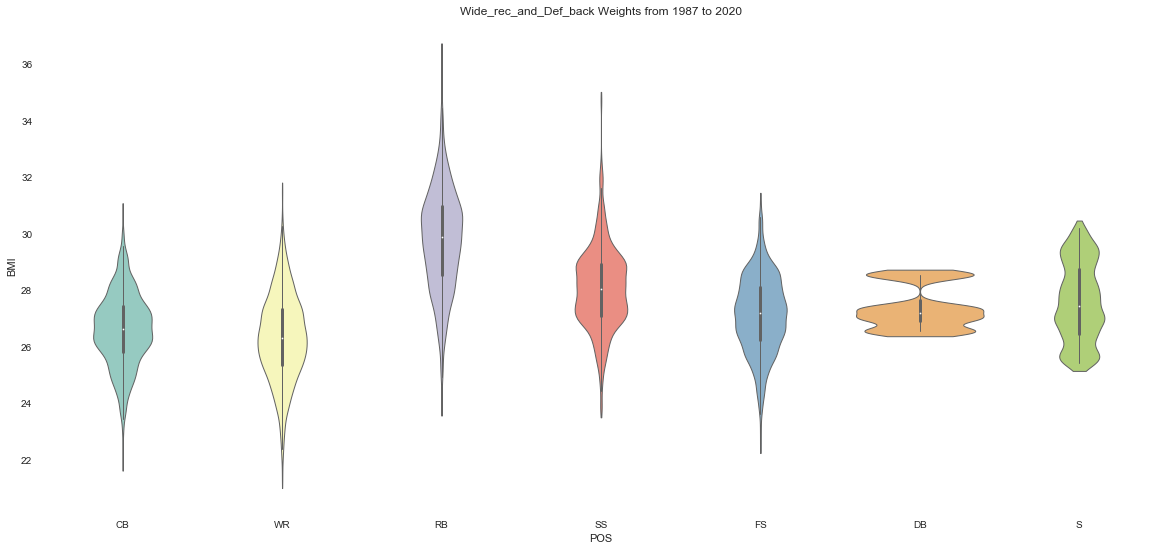

In [834]:
plt.figure(figsize=(20,9))
sns.violinplot(x='POS',y='BMI',data=WR_RB_DB_1987_to_2020,palette="Set3", bw=.2, cut=1, linewidth=1)

plt.title('Wide_rec_and_Def_back Weights from 1987 to 2020')

Text(0.5, 1.0, 'Wide_rec_and_Def_back 40 yard dash times from 1987 to 2020')

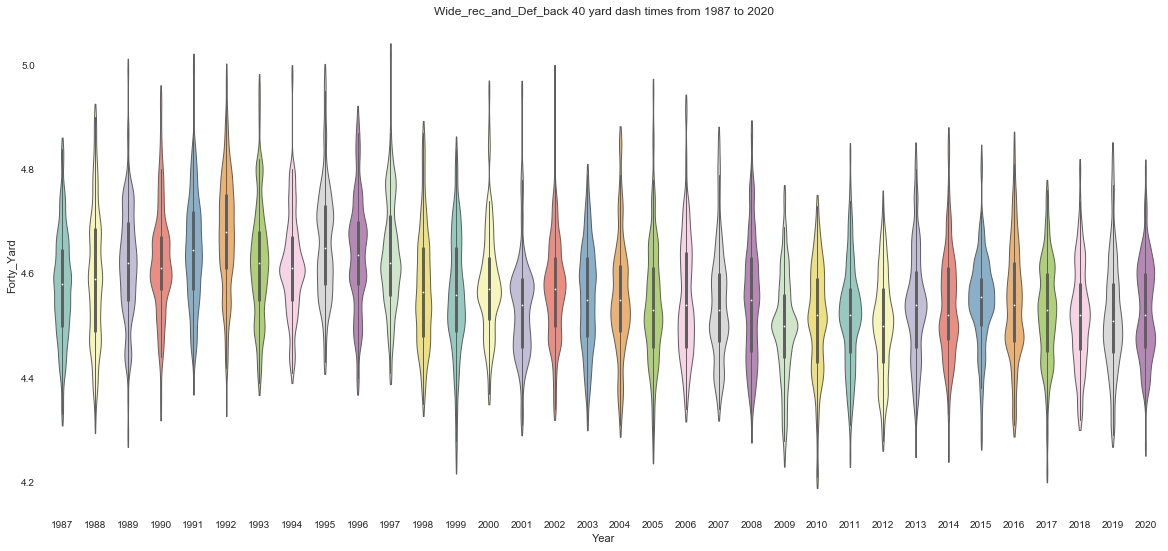

In [833]:
plt.figure(figsize=(20,9))
sns.violinplot(x='Year',y='Forty_Yard',data=WR_RB_DB_1987_to_2020,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Wide_rec_and_Def_back 40 yard dash times from 1987 to 2020')

Text(0.5, 1.0, 'Lineman Weights from 1987 to 2020')

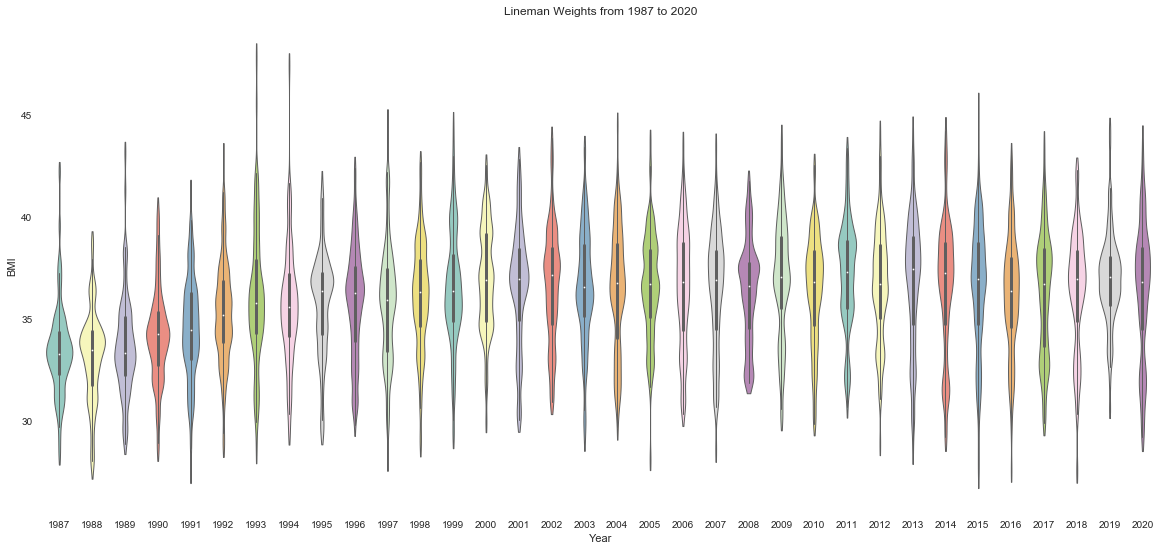

In [835]:
plt.figure(figsize=(20,9))
sns.violinplot(x='Year',y='BMI',data=lineman_1987_to_2020,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Lineman Weights from 1987 to 2020')

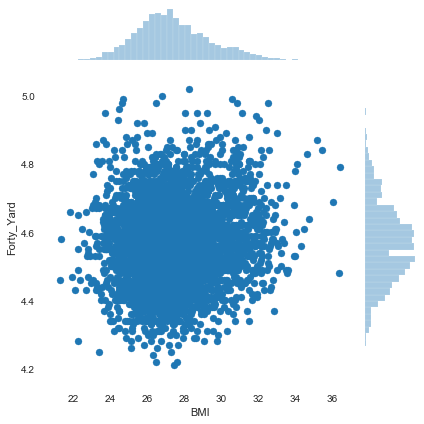

In [856]:
# Plot a scatterplot of Weight vs. 40 yard dash time for lineman
sns.jointplot(x = 'BMI',y = 'Forty_Yard',data = WR_RB_DB_1987_to_2020)
plt.show()

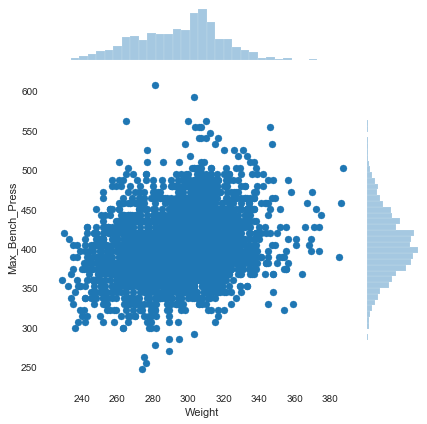

In [837]:
# Plot a scatterplot of Weight vs. Maximum Bench Press for lineman
sns.jointplot(x = 'Weight',y = 'Max_Bench_Press',data = lineman_1987_to_2020)
plt.show()

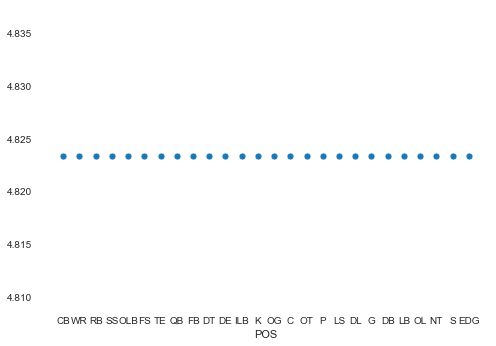

In [886]:
#sns.regplot(x='Weight',y='Height',data=df_1987_to_2020)
# scatter plot hue parameter
sns.scatterplot(x = "POS", y = df_1987_to_2020.Forty_Yard.mean(), data = df_1987_to_2020)#, hue = "Year")

In [882]:
import statsmodels
formula = 'Year ~ BMI + Forty_Yard + Max_Bench_Press'# + Vert_Leap + Broad_Jump + Shuttle' 
results = statsmodels.formula.api.ols.logit(formula, data=WR_RB_DB_1987_to_2020).fit()

AttributeError: module 'statsmodels.formula' has no attribute 'api'

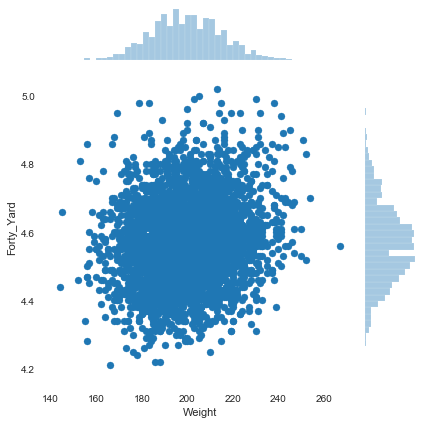

In [838]:
# Plot a scatterplot of Weight vs. 40 yard dash time for Wide receivers and defensive backs
sns.jointplot(x = 'Weight',y = 'Forty_Yard',data = WR_RB_DB_1987_to_2020)
plt.show()

Text(0.5, 1.0, 'Lineman Relative Strength from 1987 to 2020')

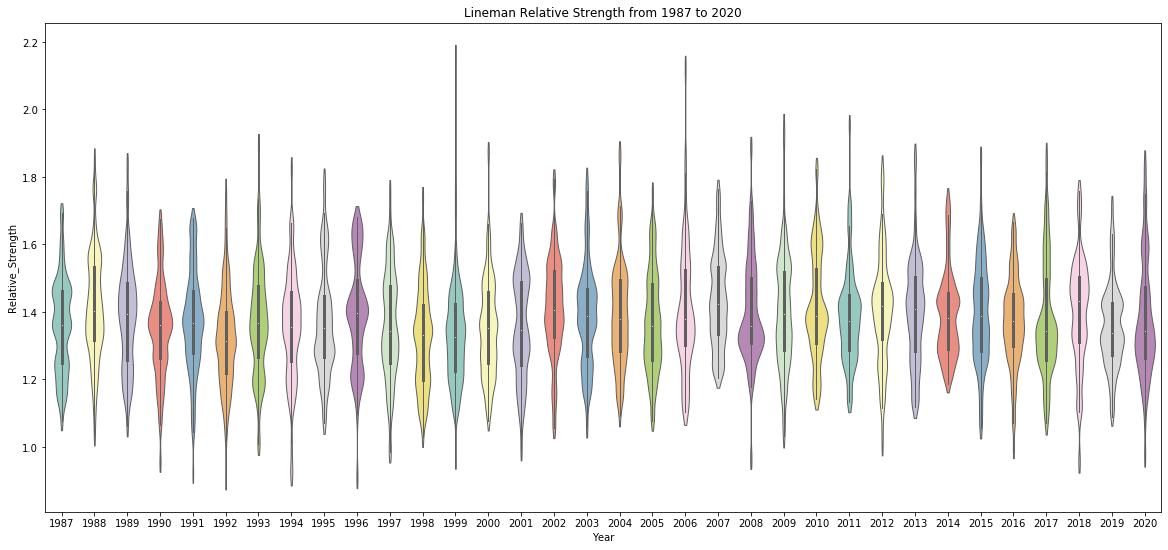

In [133]:
plt.figure(figsize=(20,9))
sns.violinplot(x='Year',y='Relative_Strength',data=lineman,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Lineman Relative Strength from 1987 to 2020')

In [319]:
lineman_1987_to_1999 = df_1987_to_1999[(df_1987_to_1999['POS'] == 'OT') | (df_1987_to_1999['POS'] == 'OG') | (df_1987_to_1999['POS']=='DL') | (df_1987_to_1999['POS'] == 'NT')
          | (df_1987_to_1999['POS'] == 'DT') | (df_1987_to_1999['POS'] == 'DE') |(df_1987_to_1999['POS'] == 'C') | (df_1987_to_1999['POS'] == 'G') 
          |(df_1987_to_1999['POS'] == 'OL') | (df_1987_to_1999['POS'] == 'LS')]

In [320]:
lineman_2000_to_2020 = df_2000_to_2020[(df_2000_to_2020['POS'] == 'OT') | (df_2000_to_2020['POS'] == 'OG') | (df_2000_to_2020['POS']=='DL') | (df_2000_to_2020['POS'] == 'NT')
          | (df_2000_to_2020['POS'] == 'DT') | (df_2000_to_2020['POS'] == 'DE') |(df_2000_to_2020['POS'] == 'C') | (df_2000_to_2020['POS'] == 'G') 
          |(df_2000_to_2020['POS'] == 'OL') | (df_2000_to_2020['POS'] == 'LS')]

Text(0.5, 1.0, 'Lineman Weights from 1987 to 1999')

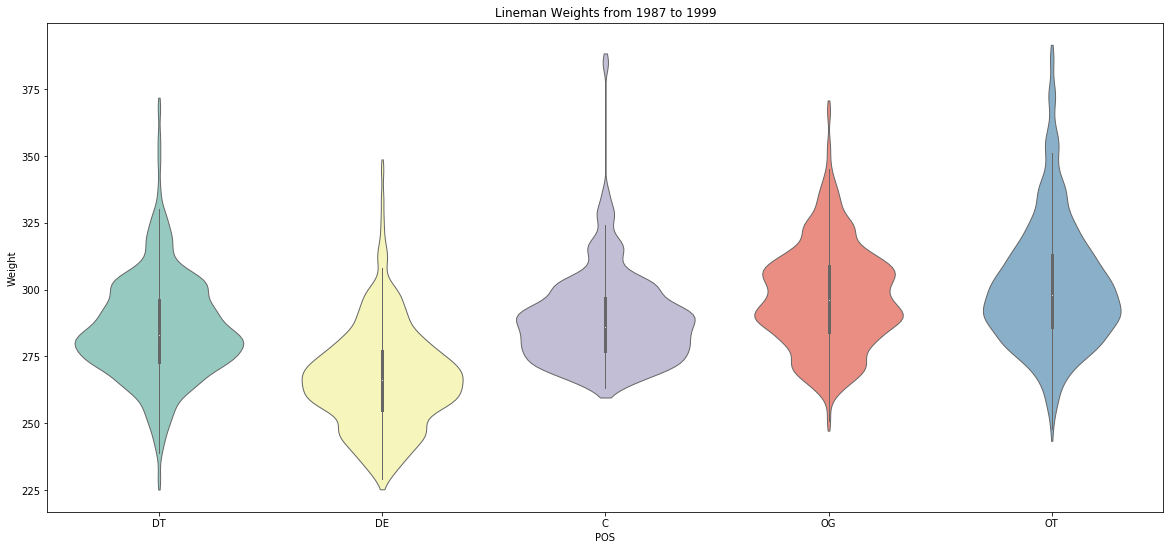

In [136]:
plt.figure(figsize=(20,9))
sns.violinplot(x='POS',y='Weight',data=lineman_1987_to_1999,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Lineman Weights from 1987 to 1999')

Text(0.5, 1.0, 'Lineman BMI from 2000 to 2020')

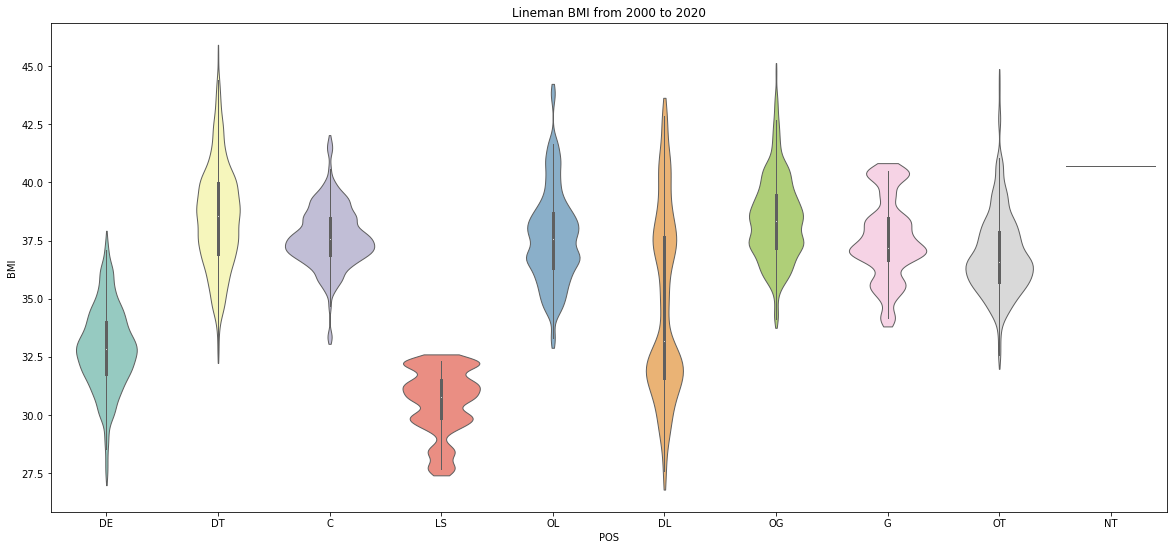

In [321]:
plt.figure(figsize=(20,9))
sns.violinplot(x='POS',y='BMI',data=lineman_2000_to_2020,palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title('Lineman BMI from 2000 to 2020')

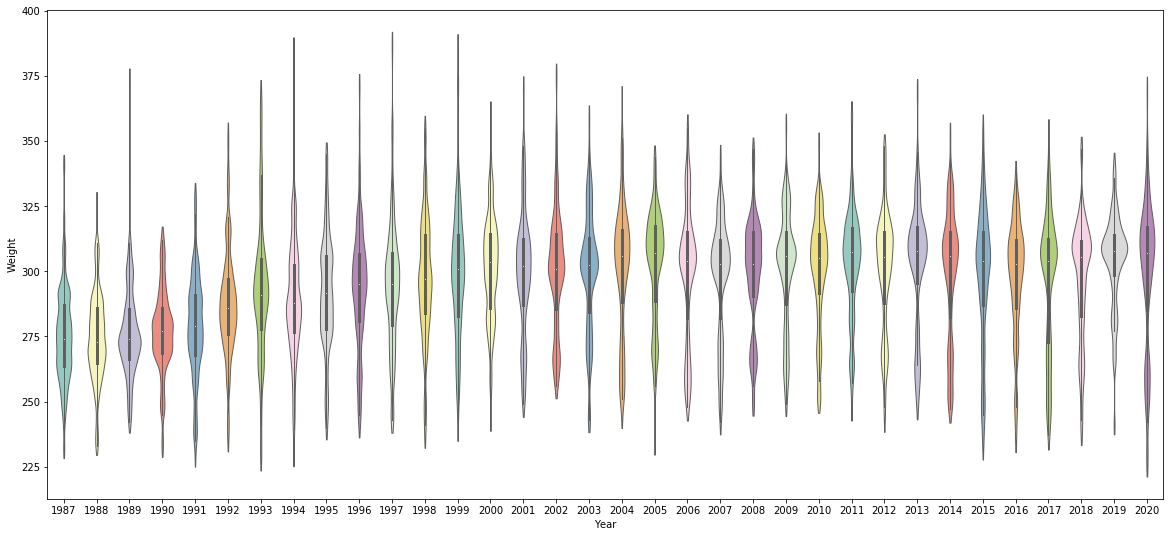

In [138]:
plt.figure(figsize=(20,9))
sns.violinplot(x='Year',y='Weight',data=lineman,palette="Set3", bw=.2, cut=1, linewidth=1)


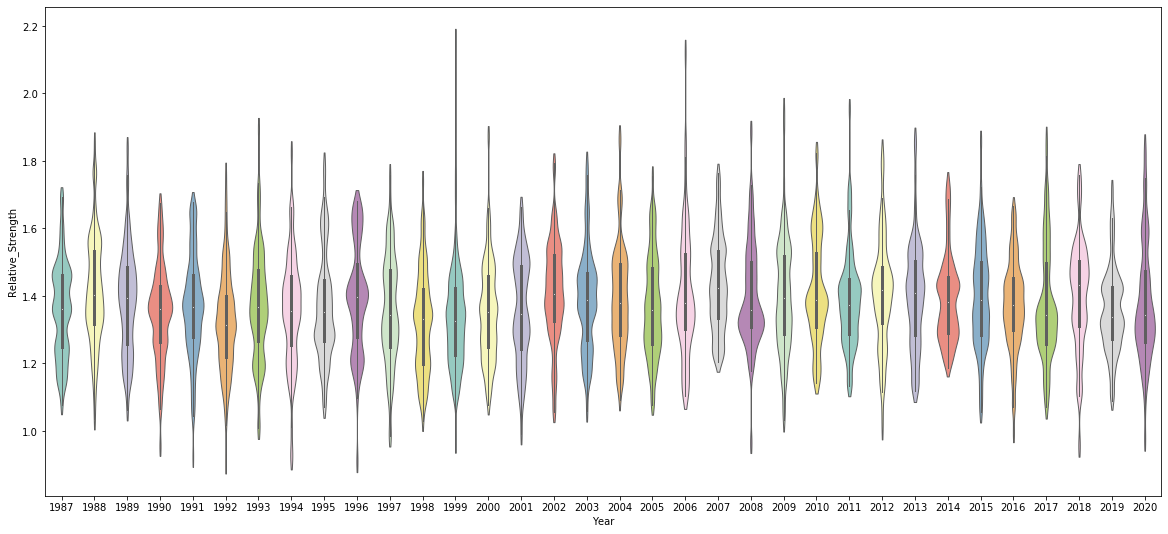

In [139]:
plt.figure(figsize=(20,9))
sns.violinplot(x='Year',y='Relative_Strength',data=lineman,palette="Set3", bw=.2, cut=1, linewidth=1)

In [858]:
import statsmodels.formula.api as smf
split_df = df_1987_to_2020['Year'].replace([1987], [0], inplace=True)


ImportError: cannot import name 'cached_value' from 'statsmodels.tools.decorators' (C:\Users\dlbry\Anaconda3\lib\site-packages\statsmodels\tools\decorators.py)

In [233]:
df_1987_to_1999.head()

,Year,Name,College,POS,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,Max_Bench_Press,Relative_Strength,BMI
0,1987,Michael Clemons,William & Mary (VA),TE,64.9,163,8.25,28.25,4.67,9.0,29.0,108.0,4.42,NaN,11.62,292.4325,1.794064,27.265054
4,1993,Kerry Henderson,Texas Southern,RB,65.9,167,8.88,27.88,4.49,18.0,34.5,118.0,4.00,NaN,11.04,359.8650,2.154880,27.092794
14,1990,Steve Broussard,Washington State,RB,66.3,201,8.00,28.00,4.45,15.0,31.0,110.0,4.29,NaN,11.47,337.3875,1.678545,32.216410
25,1992,Carlos Huerta,Miami (FL),K,66.8,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.157117
26,1988,Jamie Morris,Michigan,RB,66.8,185,8.25,NaN,4.54,NaN,30.5,110.0,4.41,NaN,11.58,NaN,NaN,29.209690


In [234]:
df_2000_to_2020.head()

,Year,Name,College,POS,Height,Weight,Hand_Size,Arm_Length,Forty_Yard,Bench_Press,Vert_Leap,Broad_Jump,Shuttle,3Cone,60Yd_Shuttle,Max_Bench_Press,Relative_Strength,BMI
1,2015,Darren Waller,Georgia Tech,WR,78.13,238,9.00,33.25,4.46,12.0,37.0,125.0,4.25,7.07,11.35,314.9100,1.323151,27.469418
2,2013,Robbie Rouse,Frenso State (CA),RB,65.75,190,9.28,28.38,4.80,15.0,34.0,114.0,4.25,6.97,11.56,337.3875,1.775724,30.964939
3,2011,Jacquizz Rodgers,Oregon State,RB,65.88,196,8.88,30.50,4.59,NaN,33.0,113.0,4.26,7.31,NaN,NaN,NaN,31.816840
5,2009,Ramses Barden,Cal Poly,WR,78.00,229,NaN,NaN,4.55,17.0,33.5,118.0,4.26,NaN,NaN,352.3725,1.538745,26.518834
6,2014,Brandon Coleman,Rutgers,WR,78.00,225,9.25,34.00,4.56,21.0,32.5,NaN,4.51,7.33,NaN,382.3425,1.699300,26.055623


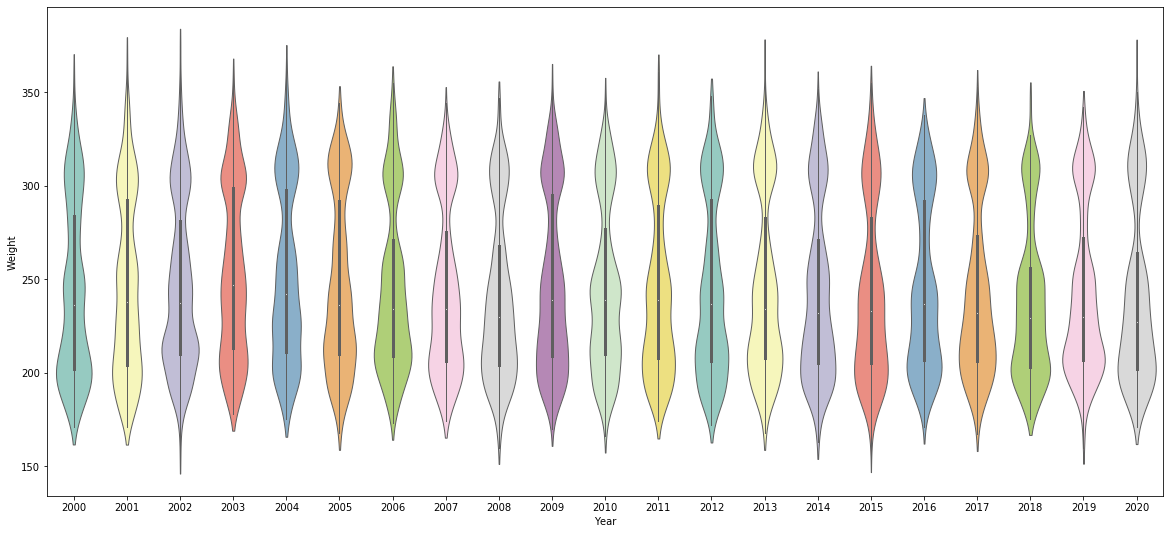

In [142]:
plt.figure(figsize=(20,9))
sns.violinplot(x='Year',y='Weight',data=df_2000_to_2020,palette="Set3", bw=.2, cut=1, linewidth=1)

In [132]:
import thinkstats2
import thinkplot

In [144]:
weights_1987_to_1999 = df_1987_to_1999.Weight
weights_1987_to_1999_dropna = weights_1987_to_1999.dropna()
print('Weights 1987 to 1999', len(weights_1987_to_1999), len(weights_1987_to_1999_dropna))
 
weights_2000_to_2020 = df_2000_to_2020.Weight
weights_2000_to_2020_dropna = weights_2000_to_2020.dropna()
print('Weights 2000 to 2020', len(weights_2000_to_2020), len(weights_2000_to_2020_dropna))

first_pmf = thinkstats2.Pmf(weights_1987_to_1999_dropna, label='1987 to 1999')
other_pmf = thinkstats2.Pmf(weights_2000_to_2020_dropna, label='2000 to 2020')

Weights 1987 to 1999 4345 4345
Weights 2000 to 2020 6562 6562


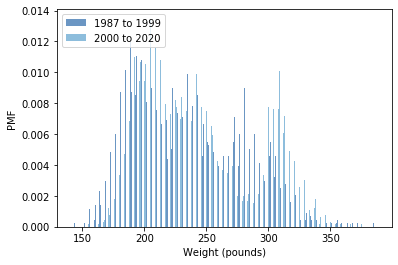

In [145]:
width = 4 / 16

# plot PMFs 
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

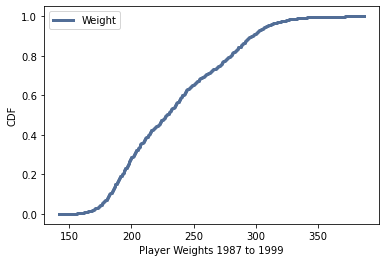

In [139]:
cdf = thinkstats2.Cdf(df_1987_to_1999.Weight, label='Weight')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Player Weights 1987 to 1999', ylabel='CDF', loc='upper left')

In [140]:
# Compute the percentage of players less than or equal to 300 lbs.
round(cdf.Prob(295)*100,1)

89.3

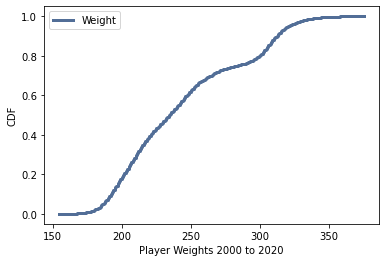

In [135]:
cdf = thinkstats2.Cdf(df_2000_to_2020.Weight, label='Weight')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Player Weights 2000 to 2020', ylabel='CDF', loc='upper left')

In [137]:
# Compute the percentage of players less than or equal to 300 lbs.
round(cdf.Prob(295)*100,1)

77.9

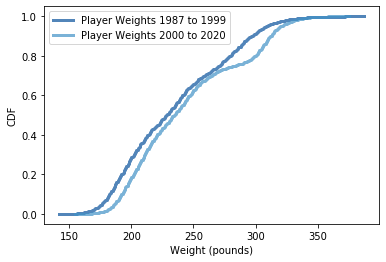

In [335]:
weight_1987_to_1999_cdf = thinkstats2.Cdf(df_1987_to_1999.Weight, label='Player Weights 1987 to 1999')
weight_2000_to_2020_cdf = thinkstats2.Cdf(df_2000_to_2020.Weight, label='Player Weights 2000 to 2020')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

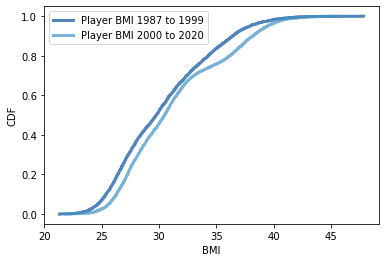

In [142]:
BMI_1987_to_1999_cdf = thinkstats2.Cdf(df_1987_to_1999.BMI, label='Player BMI 1987 to 1999')
BMI_2000_to_2020_cdf = thinkstats2.Cdf(df_2000_to_2020.BMI, label='Player BMI 2000 to 2020')

thinkplot.PrePlot(2)
thinkplot.Cdfs([BMI_1987_to_1999_cdf, BMI_2000_to_2020_cdf])
thinkplot.Config(xlabel='BMI', ylabel='CDF')

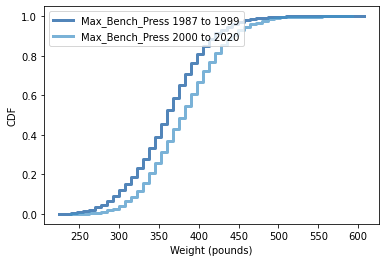

In [143]:
first_cdf = cdf = thinkstats2.Cdf(df_1987_to_1999.Max_Bench_Press, label='Max_Bench_Press 1987 to 1999')
other_cdf = thinkstats2.Cdf(df_2000_to_2020.Max_Bench_Press, label='Max_Bench_Press 2000 to 2020')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In [147]:
for i in [400,425,450,475,500]:
    print(first_cdf.Prob(i), other_cdf.Prob(i))

0.8094744121715076 0.6671046868155935
0.9145919778699861 0.8160315374507228
0.9730290456431535 0.9314498466929478
0.9889349930843707 0.967586508979413
0.9972337482710927 0.9910205869469996


In [155]:
for i in [.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99]:
    print(i,round(other_cdf.Value(i)-first_cdf.Value(i),1))

0.1 22.5
0.2 15.0
0.3 15.0
0.4 15.0
0.5 22.5
0.6 15.0
0.7 22.5
0.8 22.5
0.9 22.5
0.95 22.5
0.99 15.0


In [186]:
other_cdf.Value(0.8)

419.805

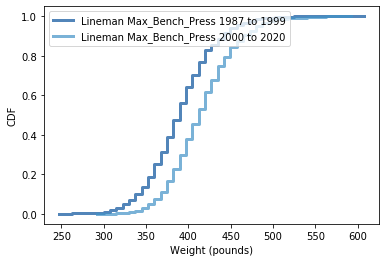

In [188]:
lineman_first_bench_cdf = thinkstats2.Cdf(lineman_1987_to_1999.Max_Bench_Press, label='Lineman Max_Bench_Press 1987 to 1999')
lineman_other_bench_cdf = cdf = thinkstats2.Cdf(lineman_2000_to_2020.Max_Bench_Press, label='Lineman Max_Bench_Press 2000 to 2020')

thinkplot.PrePlot(2)
thinkplot.Cdfs([lineman_first_cdf, lineman_other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')


In [187]:
lineman_first_cdf.Value(0.8), lineman_other_cdf.Value(0.8)

(419.805, 449.77500000000003)

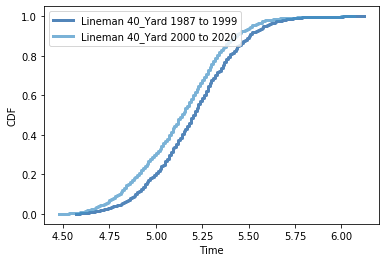

In [236]:
lineman_first_40_cdf = thinkstats2.Cdf(lineman_1987_to_1999.Forty_Yard, label='Lineman 40_Yard 1987 to 1999')
lineman_other_40_cdf = cdf = thinkstats2.Cdf(lineman_2000_to_2020.Forty_Yard, label='Lineman 40_Yard 2000 to 2020')

thinkplot.PrePlot(2)
thinkplot.Cdfs([lineman_first_40_cdf, lineman_other_40_cdf])
thinkplot.Config(xlabel='Time', ylabel='CDF')


In [352]:
lineman_first_40_cdf.Value(0.1), lineman_other_40_cdf.Value(0.1)

(4.89, 4.8)

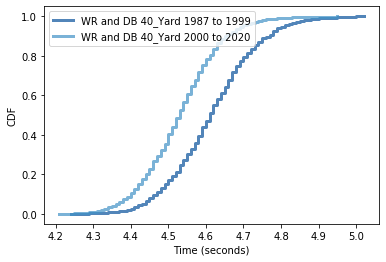

In [340]:
Wide_rec_and_Def_back_first_40_cdf = thinkstats2.Cdf(Wide_rec_and_Def_back_1987_to_1999.Forty_Yard, label='WR and DB 40_Yard 1987 to 1999')
Wide_rec_and_Def_back_other_40_cdf = cdf = thinkstats2.Cdf(Wide_rec_and_Def_back_2000_to_2020.Forty_Yard, label='WR and DB 40_Yard 2000 to 2020')

thinkplot.PrePlot(2)
thinkplot.Cdfs([Wide_rec_and_Def_back_first_40_cdf, Wide_rec_and_Def_back_other_40_cdf])
thinkplot.Config(xlabel='Time (seconds)', ylabel='CDF')

In [332]:
Wide_rec_and_Def_back_first_40_cdf.Value(0.5), Wide_rec_and_Def_back_other_40_cdf.Value(0.5)

(4.61, 4.53)

In [351]:
# Compute the percentage of Wide_rec_and_Def_back that run the 40 Yard dash under 4.4 seconds.
round(Wide_rec_and_Def_back_first_40_cdf.Prob(4.4)*100,1),round(Wide_rec_and_Def_back_other_40_cdf.Prob(4.4)*100,1)

(2.7, 10.8)

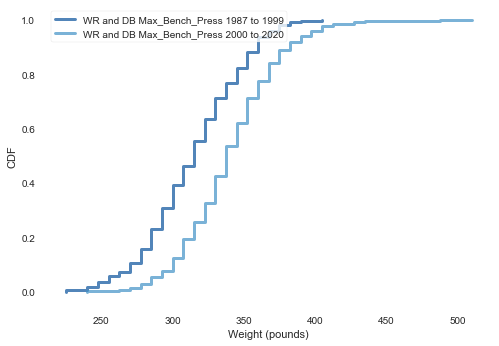

In [887]:
Wide_rec_and_Def_back_first_bench_cdf = thinkstats2.Cdf(Wide_rec_and_Def_back_1987_to_1999.Max_Bench_Press, label='WR and DB Max_Bench_Press 1987 to 1999')
Wide_rec_and_Def_back_other_bench_cdf = thinkstats2.Cdf(Wide_rec_and_Def_back_2000_to_2020.Max_Bench_Press, label='WR and DB Max_Bench_Press 2000 to 2020')

thinkplot.PrePlot(2)
thinkplot.Cdfs([Wide_rec_and_Def_back_first_bench_cdf, Wide_rec_and_Def_back_other_bench_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In [893]:
# Compute the percentage of Wide_rec_and_Def_back that bench less than or equal to 300 lbs.
round(Wide_rec_and_Def_back_first_bench_cdf.Prob(350)*100,1)

82.1